<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/280324_1035_Normal_fundus_images_CNN_model_by_binary_classification_of_fundus_laterality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
os.listdir('/content/drive/MyDrive/Normal Fundus Images/split')

['train', 'val', 'test']

In [3]:
os.listdir('/content/drive/MyDrive/Normal Fundus Images/split/train'),
os.listdir('/content/drive/MyDrive/Normal Fundus Images/split/val'),
os.listdir('/content/drive/MyDrive/Normal Fundus Images/split/test')


['left eye fundus', 'right eye fundus']

In [4]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

trainimages = datagen.flow_from_directory('/content/drive/MyDrive/Normal Fundus Images/split/train',
                                          target_size = (64,64),
                                          class_mode='binary')
valimages = datagen.flow_from_directory('/content/drive/MyDrive/Normal Fundus Images/split/val',
                                          target_size = (64,64),
                                          class_mode='binary')
testimages = datagen.flow_from_directory('/content/drive/MyDrive/Normal Fundus Images/split/test',
                                          target_size = (64,64),
                                          class_mode='binary')

Found 846 images belonging to 2 classes.
Found 103 images belonging to 2 classes.
Found 84 images belonging to 2 classes.


In [5]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

model = Sequential([Conv2D(32,(3,3), activation = 'relu', input_shape = (64,64,3)),
                    MaxPooling2D(2,2),

                    Conv2D(32,(3,3), activation='relu'),
                    MaxPooling2D(2,2),
                    Conv2D(64,(3,3), activation='relu'),
                    MaxPooling2D(2,2),

                    Flatten(),
                    Dense(128, activation = 'relu'),
                    Dense(1, activation = 'sigmoid')])

model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = 'accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0

In [6]:
model.fit(trainimages,
          batch_size= 32,
          epochs =50,
          validation_data=valimages)
model.save('binary_cnnmodel.keras')

Epoch 1/50
27/27 [==============================] - 280s 10s/step - loss: 2.8804 - accuracy: 0.7872 - val_loss: 0.1309 - val_accuracy: 0.9612
Epoch 2/50
27/27 [==============================] - 8s 284ms/step - loss: 0.1251 - accuracy: 0.9669 - val_loss: 0.0926 - val_accuracy: 0.9515
Epoch 3/50
27/27 [==============================] - 7s 256ms/step - loss: 0.0844 - accuracy: 0.9823 - val_loss: 0.0759 - val_accuracy: 0.9709
Epoch 4/50
27/27 [==============================] - 7s 273ms/step - loss: 0.0846 - accuracy: 0.9787 - val_loss: 0.1286 - val_accuracy: 0.9223
Epoch 5/50
27/27 [==============================] - 7s 263ms/step - loss: 0.0673 - accuracy: 0.9823 - val_loss: 0.0771 - val_accuracy: 0.9806
Epoch 6/50
27/27 [==============================] - 7s 253ms/step - loss: 0.0645 - accuracy: 0.9858 - val_loss: 0.0594 - val_accuracy: 0.9903
Epoch 7/50
27/27 [==============================] - 8s 292ms/step - loss: 0.0523 - accuracy: 0.9870 - val_loss: 0.0775 - val_accuracy: 0.9806
Epoch 

In [7]:
y_true = testimages.classes

In [8]:
testimages.class_indices

{'left eye fundus': 0, 'right eye fundus': 1}

In [9]:
y_pred=model.predict(testimages)

3/3 [==============================] - 27s 14s/step


In [10]:
y_pred[y_pred<=0.5]=0
y_pred[y_pred>0.5]=1

In [11]:
from sklearn import metrics
metrics.confusion_matrix(y_true,y_pred)

array([[27, 15],
       [17, 25]])

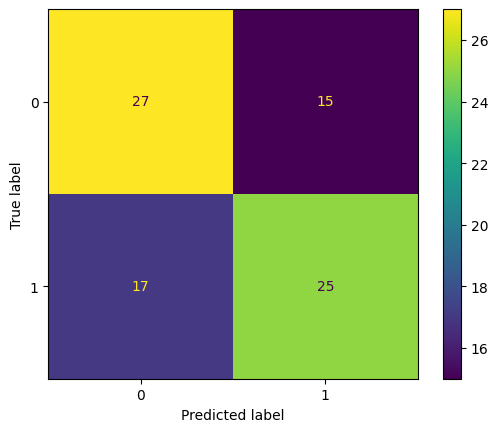

In [12]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true,y_pred)

In [13]:
print(metrics.classification_report(y_true,y_pred,
                                    target_names=['left eye fundus',
                                                  'right eye fundus']))

                  precision    recall  f1-score   support

 left eye fundus       0.61      0.64      0.63        42
right eye fundus       0.62      0.60      0.61        42

        accuracy                           0.62        84
       macro avg       0.62      0.62      0.62        84
    weighted avg       0.62      0.62      0.62        84



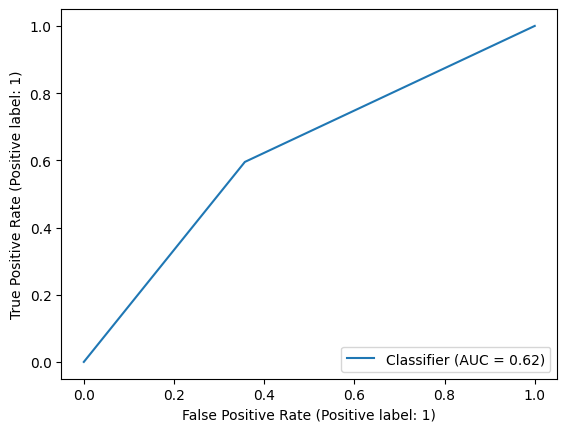

In [14]:
metrics.RocCurveDisplay.from_predictions(y_true,y_pred)

1/1 [==============================] - 0s 324ms/step
Prediction: Left eye fundus


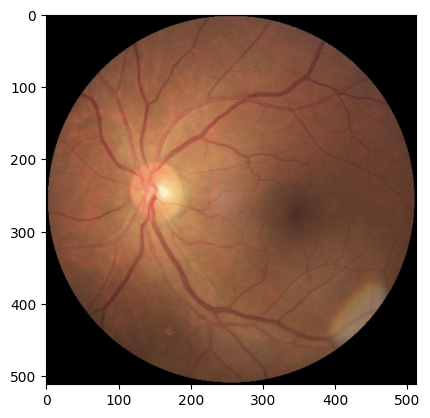

In [15]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained CNN model
model = load_model('/content/binary_cnnmodel.keras')  # Provide the path to your trained model file

# Define a function to predict unknown images
def predict_unknown_image(image_path):
    img = image.load_img(image_path, target_size=(64,64))  # Assuming images are resized to 150x150
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    img_array /= 255.0  # Normalize pixel values

    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        return "Right eye fundus"  # Example class names, modify as per your binary classes
    else:
        return "Left eye fundus"

# Example usage:
unknown_image_path = "/content/drive/MyDrive/Normal Fundus Images/left eye fundus/1034_left.jpg"  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage1 = image.load_img('/content/drive/MyDrive/Normal Fundus Images/left eye fundus/1034_left.jpg')
plt.imshow(testimage1)


1/1 [==============================] - 0s 21ms/step
Prediction: Right eye fundus


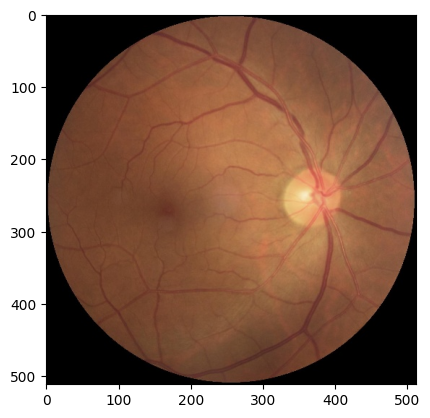

In [16]:
# Example usage:
unknown_image_path = "/content/drive/MyDrive/Normal Fundus Images/right eye fundus/1034_right.jpg"  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

testimage1 = image.load_img('/content/drive/MyDrive/Normal Fundus Images/right eye fundus/1034_right.jpg')
plt.imshow(testimage1)

1/1 [==============================] - 0s 17ms/step
Prediction: Left eye fundus


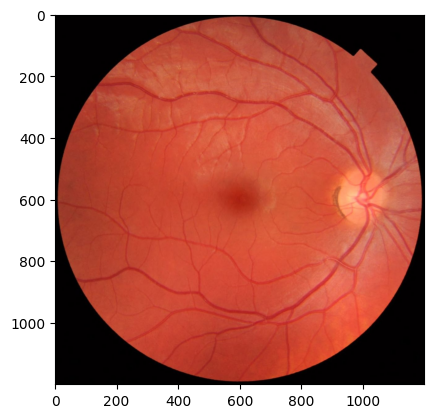

In [17]:
unknown_image_path = "/content/drive/MyDrive/1200px-Fundus_photograph_of_normal_right_eye.jpg"  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

testimage1 = image.load_img('/content/drive/MyDrive/1200px-Fundus_photograph_of_normal_right_eye.jpg')
plt.imshow(testimage1)